In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Dispaly all the columns of the DataFrame
pd.pandas.set_option("display.max_columns",None)

In [2]:
house=pd.read_csv('California housing .csv')

In [3]:
## print the top5 records
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [4]:
## print the last5 records
house.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,89400,INLAND


In [5]:
## print shape of datast with columns and rows
house.shape

(20640, 10)

In [6]:
house.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
median_house_value    20640 non-null int64
ocean_proximity       20640 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [8]:
house.skew()

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.459546
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
dtype: float64

In [9]:
house.var()

longitude             4.014139e+00
latitude              4.562293e+00
housing_median_age    1.583963e+02
total_rooms           4.759445e+06
total_bedrooms        1.775654e+05
population            1.282470e+06
households            1.461760e+05
median_income         3.609323e+00
median_house_value    1.331615e+10
dtype: float64

In [10]:
house.duplicated().any()

False

## Observation(s)
we got no duplicated rows

In [11]:
house.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### In Data Analysis We will Analyze To Find out the below stuff
1.Missing Values,
2.All The Numerical Variables
3.Distribution of the Numerical Variables
4.Categorical Variables
5.Cardinality of Categorical Variables
6.Outliers
7.Relationship between independent and dependent feature(median_house_value)


## Missing Values

In [12]:
## Here we will chek the percentge of missing values of each feature 
## 1- step make the list of featute which has missing values

features_with_na=[feature for feature in house.columns if house[feature].isnull().sum()>1]

##2- step print the feature name and percentage of missing values
for feature in features_with_na:
    print(feature,np.round(house[feature].isnull().mean(),4), '%missing values')

total_bedrooms 0.01 %missing values


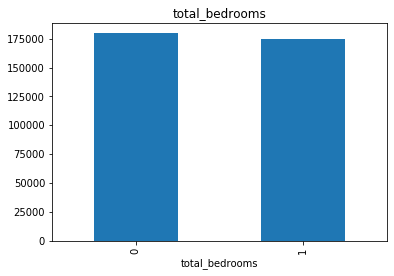

In [13]:
for feature in features_with_na:
    data=house.copy()
    
    # let's make a variable that indicate 1 if the obsevation was missing or zero otherwise
    data[feature]= np.where(data[feature].isnull(),1,0)
    
    # let's calculate the mean of house price where the information is missing or  present
    data.groupby(feature)['median_house_value'].median().plot.bar()
    plt.title(feature)
    plt.show()

Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

## Numerical Variables

In [14]:
## list of the Numerical variable
numerical_features=[feature for feature in house.columns if house[feature].dtypes != 'O']

print('Number of numerical variables', len(numerical_features))

## Visible the numerical variables
house[numerical_features].head()

Number of numerical variables 9


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


In [15]:
## Numerical varibales are usually 2 types
## 1 Continous Variables and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(house[feature].unique())<25]

print("Discrete Variables Count:{}".format(len(discrete_feature)))

Discrete Variables Count:0


In [16]:
discrete_feature

[]

### Continuous Variable

In [17]:
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature]

print("Continuous Variables Count:{}".format(len(continuous_feature)))

Continuous Variables Count:9


In [18]:
continuous_feature

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

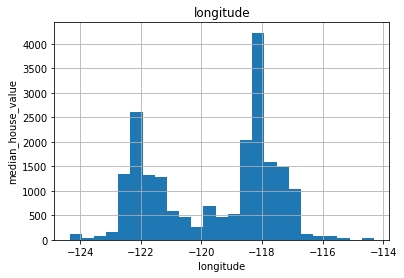

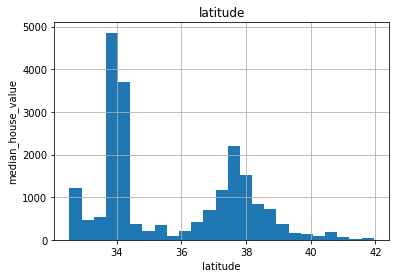

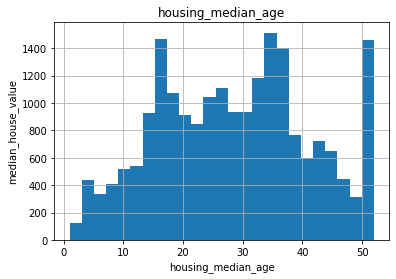

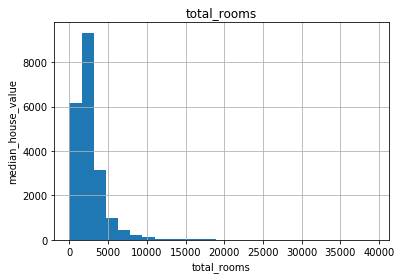

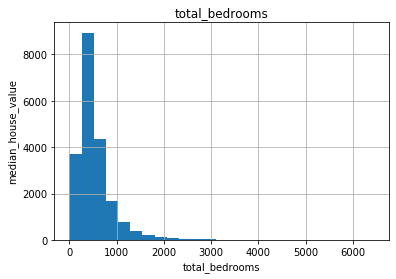

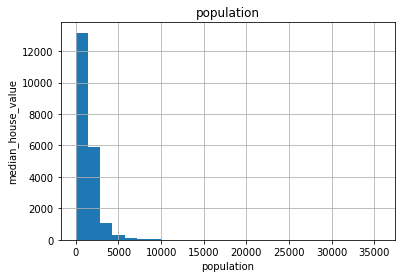

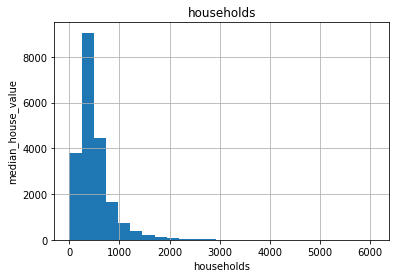

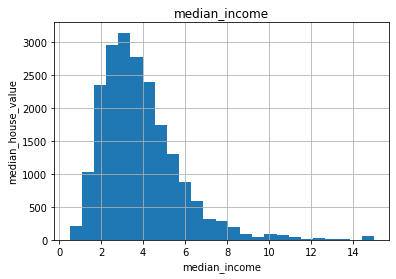

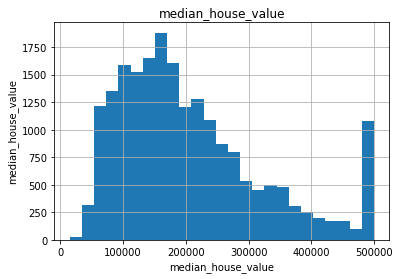

In [19]:
## let's analyse the continuous value by creating histograms to understand the distribution

for feature in continuous_feature:
    data=house.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('median_house_value')
    plt.title(feature)
    plt.show()
        

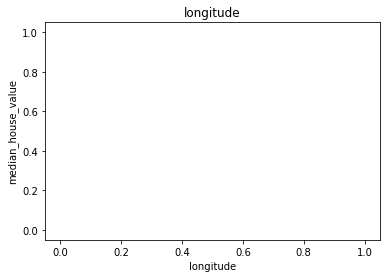

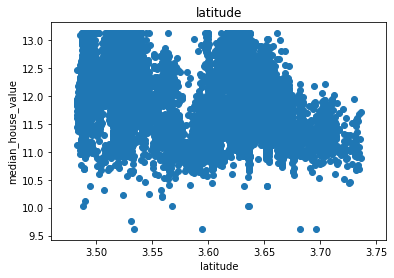

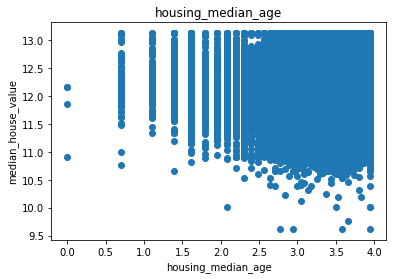

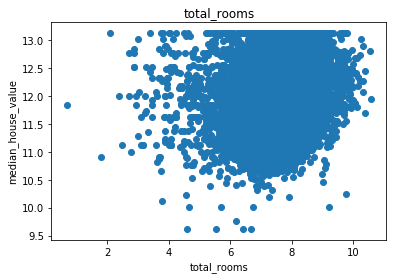

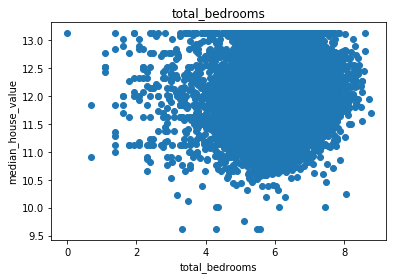

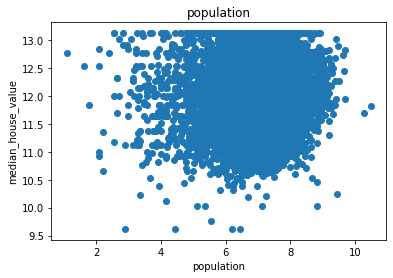

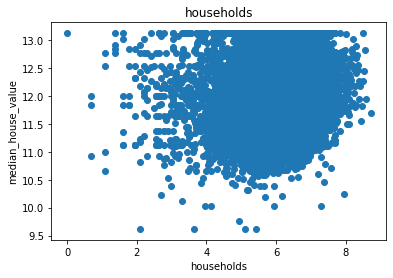

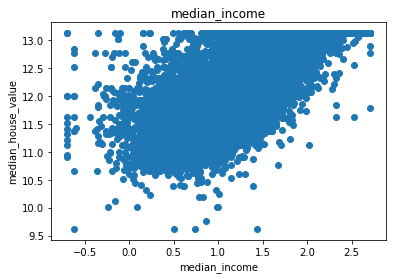

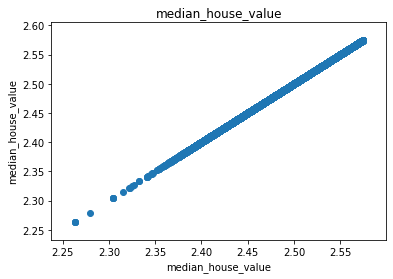

In [20]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=house.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['median_house_value']=np.log(data['median_house_value'])
        plt.scatter(data[feature],data['median_house_value'])
        plt.xlabel(feature)
        plt.ylabel('median_house_value')
        plt.title(feature)
        plt.show()

        

### Outliers

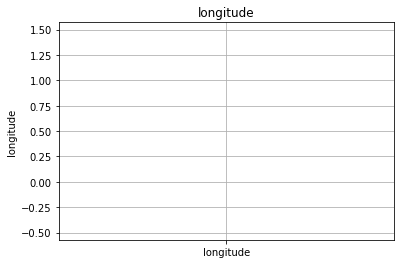

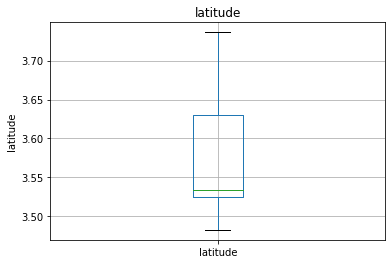

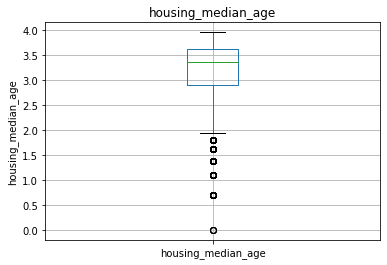

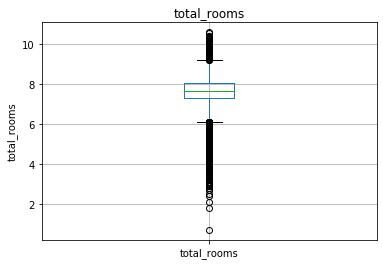

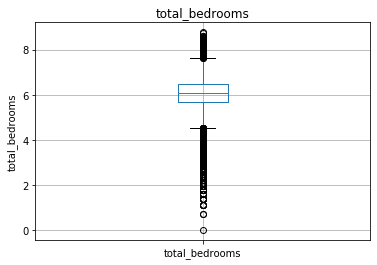

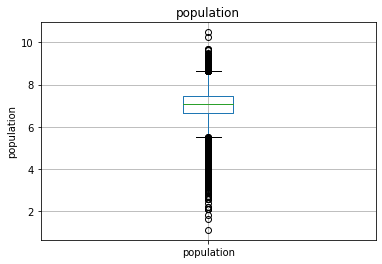

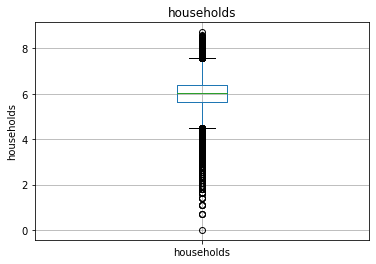

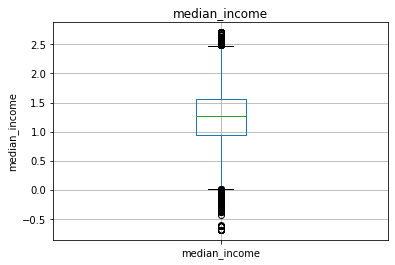

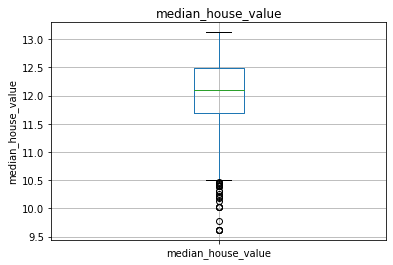

In [21]:
for feature in continuous_feature:
    data=house.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

### Categorical Variables

In [22]:
categorical_features=[feature for feature in house.columns if house[feature].dtypes == 'O']

print("Categorical variable Count:{}".format(len(categorical_features)))

Categorical variable Count:1


In [23]:
categorical_features

['ocean_proximity']

In [24]:
house[categorical_features].head()

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


In [25]:
for feature in categorical_features:
    print("The feature is {} and number of categories are {}".format(feature,len(house[feature].unique())))

The feature is ocean_proximity and number of categories are 5


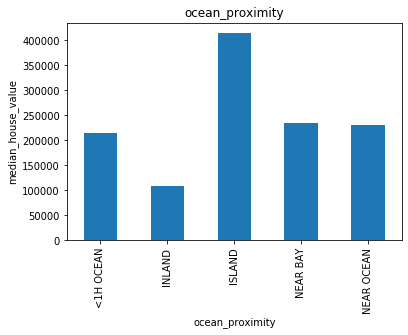

In [26]:
for feature in categorical_features:
    data=house.copy()
    data.groupby(feature)['median_house_value'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('median_house_value')
    plt.title(feature)
    plt.show()

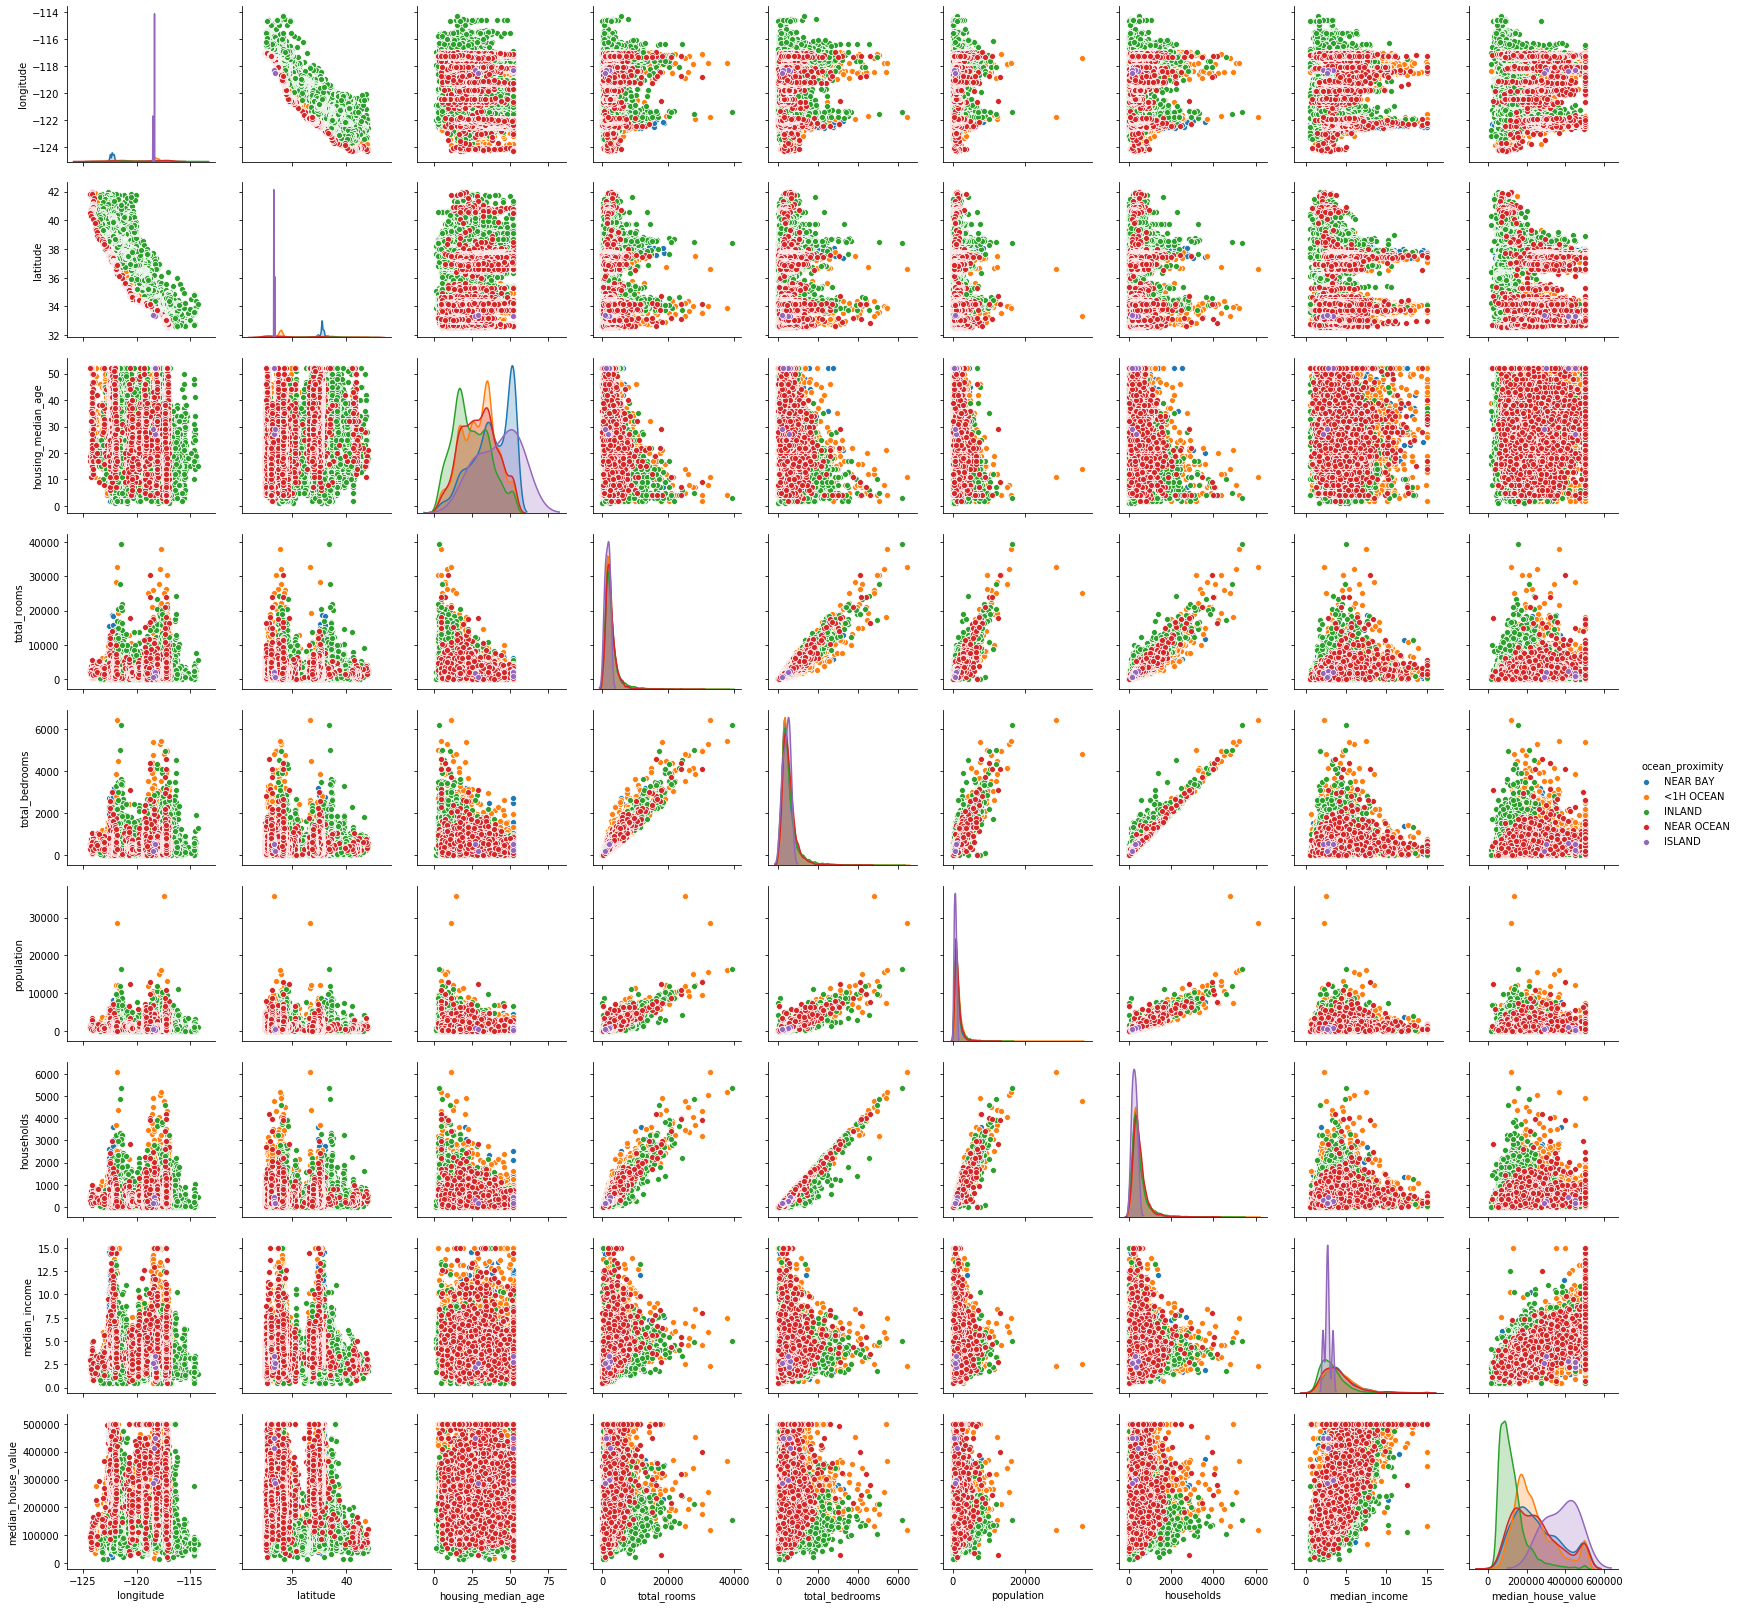

In [27]:
sns.pairplot(house,hue='ocean_proximity')

## Feature Engineering

We will be performing all the below steps in Feature Engineering
1.Missing values
2.Categorical variables: remove rare labels
3.Standarise the values of the variables to the same range

In [28]:
## Always remember there way always be a chans of data leakage soe we need to split the data firs and the apply feature
## Engineering
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(house,house['median_house_value'],test_size=0.1,random_state=0)

In [29]:
X_train.shape,X_test.shape

((18576, 10), (2064, 10))

## Missing Values

In [30]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in house.columns if house[feature].isnull().sum()>1 and house[feature].dtypes!='O']

## We will print the numericl nan variables and percentge of missing values
for feature in numerical_with_nan:
    print("{}:{}% missing value".format(feature,np.around(house[feature].isnull().mean(),4)))

total_bedrooms:0.01% missing value


In [31]:
## Replacing the numericsl Missing Values
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=house[feature].median()
    
    ## create a new feature to capture nan values
    house[feature+'nan']=np.where(house[feature].isnull(),1,0)
    house[feature].fillna(median_value,inplace=True)
    
house[numerical_with_nan].isnull().sum()
    

total_bedrooms    0
dtype: int64

In [32]:
house.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroomsnan
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,0
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY,0
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY,0
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY,0
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY,0
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY,0


## Numerical Variables

In [33]:
num_features=[ 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']
for feature in num_features:
    house[feature]=np.log(house[feature])

In [34]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroomsnan
0,-122.23,3.634423,3.713572,6.779922,4.859812,5.774552,4.836282,2.119287,13.022764,NEAR BAY,0
1,-122.22,3.633895,3.044522,8.867709,7.008505,7.783641,7.037028,2.116424,12.789684,NEAR BAY,0
2,-122.24,3.633631,3.951244,7.290975,5.247024,6.206576,5.176150,1.982022,12.771671,NEAR BAY,0
3,-122.25,3.633631,3.951244,7.149917,5.459586,6.324359,5.389072,1.730434,12.740517,NEAR BAY,0
4,-122.25,3.633631,3.951244,7.394493,5.634790,6.336826,5.556828,1.347086,12.743151,NEAR BAY,0


## Handling the Categorical Variables

In [35]:
categorical_features=[feature for feature in house.columns if house[feature].dtypes=='O']

In [36]:
categorical_features

['ocean_proximity']

In [37]:
for feature in categorical_features:
    labels_ordered=house.groupby([feature])['median_house_value'].mean().sort_values().index
    labels_ordered={k:1 for i,k in enumerate(labels_ordered,0)}
    house[feature]=house[feature].map(labels_ordered)

In [38]:
house.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroomsnan
0,-122.23,3.634423,3.713572,6.779922,4.859812,5.774552,4.836282,2.119287,13.022764,1,0
1,-122.22,3.633895,3.044522,8.867709,7.008505,7.783641,7.037028,2.116424,12.789684,1,0
2,-122.24,3.633631,3.951244,7.290975,5.247024,6.206576,5.176150,1.982022,12.771671,1,0
3,-122.25,3.633631,3.951244,7.149917,5.459586,6.324359,5.389072,1.730434,12.740517,1,0
4,-122.25,3.633631,3.951244,7.394493,5.634790,6.336826,5.556828,1.347086,12.743151,1,0
5,-122.25,3.633631,3.951244,6.823286,5.361292,6.023448,5.262690,1.395452,12.505066,1,0
6,-122.25,3.633367,3.951244,7.837949,6.192362,6.997596,6.242223,1.297217,12.608868,1,0
7,-122.25,3.633367,3.951244,8.040447,6.532334,7.053586,6.472346,1.137833,12.394211,1,0
8,-122.26,3.633367,3.737670,7.845808,6.499787,7.095064,6.388561,0.732560,12.331383,1,0
9,-122.25,3.633367,3.951244,8.174421,6.561031,7.346655,6.570883,1.305952,12.472659,1,0


## Feature Scaling

In [39]:
house.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'total_bedroomsnan'],
      dtype='object')

In [40]:
feature_scale=[feature for feature in house.columns if feature not in['median_house_value']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(house[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [41]:
scaler.transform(house[feature_scale])

array([[0.21115538, 0.59822119, 0.9398489 , ..., 0.82690389, 0.        ,
        0.        ],
       [0.21215139, 0.59614204, 0.77052256, ..., 0.82606221, 0.        ,
        0.        ],
       [0.21015936, 0.59510205, 1.        , ..., 0.78654837, 0.        ,
        0.        ],
       ...,
       [0.31175299, 0.75610452, 0.71704343, ..., 0.35984418, 0.        ,
        0.        ],
       [0.30179283, 0.75610452, 0.73150936, ..., 0.38742447, 0.        ,
        0.        ],
       [0.30976096, 0.75010927, 0.70170025, ..., 0.45982617, 0.        ,
        0.        ]])

In [42]:
# transform the train and test set, and add on the Id and SalePrice variables
data=pd.concat([house[[ 'median_house_value']].reset_index(drop=True),
               pd.DataFrame(scaler.transform(house[feature_scale]),columns=feature_scale)],
               axis=1)

In [43]:
data.head()

,median_house_value,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,total_bedroomsnan
0,13.022764,0.211155,0.598221,0.939849,0.615675,0.554074,0.498300,0.555059,0.826904,0.0,0.0
1,12.789684,0.212151,0.596142,0.770523,0.826854,0.799049,0.712402,0.807639,0.826062,0.0,0.0
2,12.771671,0.210159,0.595102,1.000000,0.667368,0.598220,0.544339,0.594066,0.786548,0.0,0.0
3,12.740517,0.209163,0.595102,1.000000,0.653100,0.622454,0.556891,0.618503,0.712582,0.0,0.0
4,12.743151,0.209163,0.595102,1.000000,0.677839,0.642430,0.558219,0.637756,0.599880,0.0,0.0


In [44]:
data.describe()

,median_house_value,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,total_bedroomsnan
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.0,20640.000000
mean,12.084884,0.476125,0.350387,0.816233,0.701516,0.689917,0.631462,0.686416,0.569709,0.0,0.010029
std,0.569134,0.199555,0.233271,0.143688,0.076018,0.083126,0.078702,0.084134,0.138370,0.0,0.099644
min,9.615739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,11.691908,0.253984,0.164678,0.731509,0.666032,0.649150,0.593536,0.646704,0.480590,0.0,0.000000
50%,12.099044,0.583665,0.202782,0.852212,0.704944,0.692658,0.635428,0.690193,0.575058,0.0,0.000000
75%,12.486447,0.631474,0.580513,0.913869,0.744601,0.737258,0.677165,0.735127,0.661512,0.0,0.000000
max,13.122365,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


## Feature Selection

In [45]:
## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [46]:

## Capture the dependent feature
y=data[['median_house_value']]

In [47]:
## drop dependent feature from dataset
X=data.drop(['median_house_value'],axis=1)


In [48]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [49]:
feature_sel_model.get_support()

array([ True,  True,  True, False, False, False, False,  True, False,
       False])

In [50]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 10
selected features: 4


In [51]:

selected_feat

Index(['longitude', 'latitude', 'housing_median_age', 'median_income'], dtype='object')

In [52]:
X=X[selected_feat]

In [53]:
X.head()

,longitude,latitude,housing_median_age,median_income
0,0.211155,0.598221,0.939849,0.826904
1,0.212151,0.596142,0.770523,0.826062
2,0.210159,0.595102,1.000000,0.786548
3,0.209163,0.595102,1.000000,0.712582
4,0.209163,0.595102,1.000000,0.599880


In [54]:
y.head()

,median_house_value
0,13.022764
1,12.789684
2,12.771671
3,12.740517
4,12.743151


In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [56]:
X_train.shape,X_test.shape

((18576, 4), (2064, 4))

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_error

## LinearRegression

In [58]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
print ("R2 of Linear Regresson:", lr.score(X_train,y_train))

R2 of Linear Regresson: 0.6178378900454085


In [60]:
lr_pred=lr.score(X_test,y_test)
print("lr prediction",lr_pred)

lr prediction 0.6202248587883974


## KNeighborsRegressor

In [61]:
KNN=KNeighborsRegressor()
KNN.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [62]:
print ("R2 of KNeighbors Regresson:", KNN.score(X_train,y_train))

R2 of KNeighbors Regresson: 0.8432419643726207


## SVR

In [64]:
sv=SVR()
sv.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [65]:
print ("R2 of SVR Regresson:", sv.score(X_train,y_train))

R2 of SVR Regresson: 0.6434285133950362


## DecisionTreeRegressor

In [75]:
DT=DecisionTreeRegressor()
DT.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [76]:
print ("R2 of DecisionTree Regresson:", DT.score(X_train,y_train))

R2 of DecisionTree Regresson: 0.9999999990280539


In [77]:
## ShuffleSplit it use forspliting a data in equal amount
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(DecisionTreeRegressor(),X,y,cv=cv)

array([0.68843445, 0.70018296, 0.68922474, 0.7186027 , 0.68513046])

In [79]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [80]:
print ("R2 of SVR Regresson:", rf.score(X_train,y_train))

R2 of SVR Regresson: 0.9688740739152333


In [81]:
#predict the value
pred=rf.predict(X_test)
print("Predicted result price:",pred)
print("actual price",y_test)

Predicted result price: [12.21946297 12.35306787 11.77885662 ... 12.38828797 12.4829681
 11.84217441]
actual price        median_house_value
14740           11.827006
10101           12.393796
20566           12.209567
2670            11.191342
15709           13.038982
439             11.695247
845             12.417144
3768            12.727541
964             12.735818
8681            12.489747
17935           12.379606
9228            11.431715
13579           11.283512
74              11.831379
6349            12.301837
16980           12.528518
11495           12.887400
15631           12.611538
477             12.115601
15812           12.864628
14770           11.786001
2055            11.214519
17722           12.350173
18465           12.884360
11693           12.078807
4139            12.063356
8463            12.216518
20224           12.048249
16196           11.436044
9219            10.950807
...                   ...
6784            12.851604
11625           12.159505
1

In [82]:
## ShuffleSplit it use forspliting a data in equal amount
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(RandomForestRegressor(),X,y,cv=cv)

array([0.81779847, 0.82105477, 0.82686676, 0.83736506, 0.81647944])

In [87]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.620784,{'normalize': False}
1,lasso,-0.000115,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.697987,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


### Based on above results we can say that RandomForestRegression gives the best score. Hence we will use that.

## Export the tested model to a pickle file

In [89]:
import pickle
with open('California_housing_model.pickle','wb') as f:
    pickle.dump(rf,f)